Text(0.5, 1.0, 'Cambios porcentuales del ETF 5 a lo largo del mes de marzo')

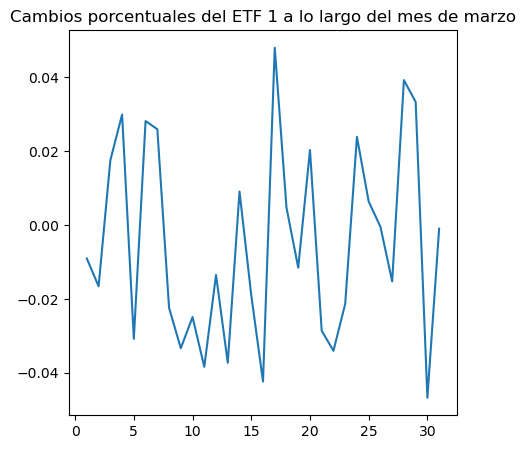

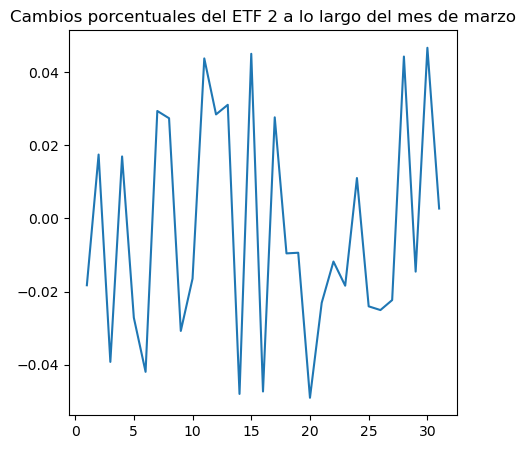

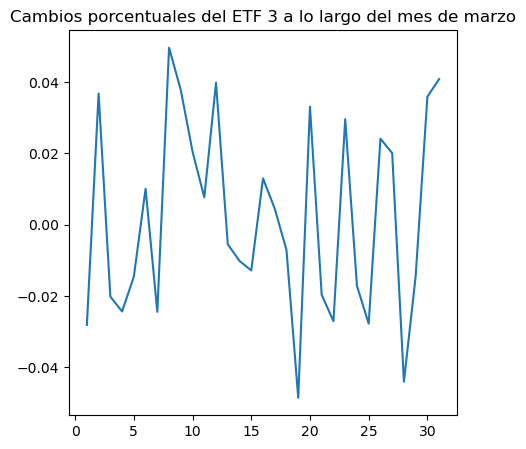

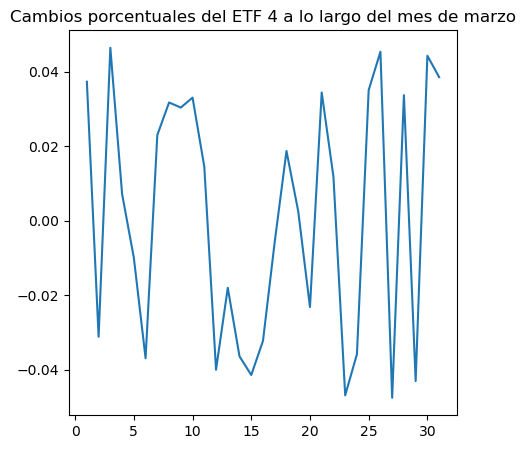

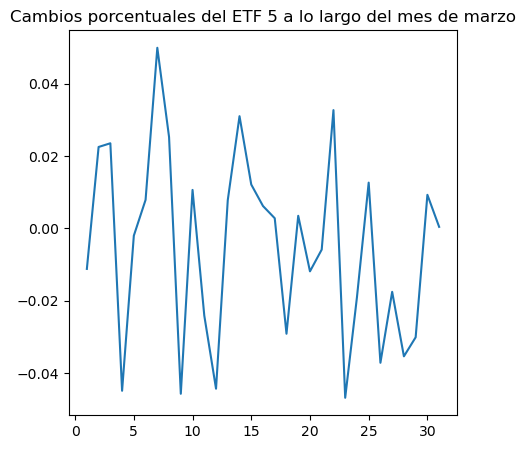

In [142]:
import random
import numpy as np

#Lógica de inversiones, se plantea una inversión al inicio de cada día durante el mes de marzo.
#La inversión o retiro de cada día dependerá de la predicción del modelo referente a la tendencia de la ETF al final de ese día.

#Se inicia el proceso un día antes del primer día de marzo (fehca de inicio de la inversión).
#Se busca el estado actual de cada ETF para el 31 de marzo, una vez cerrada la bolsa.

#Se inicializan 31 valores para cada ETF, que representan el valor de cada ETF al final de cada día o al inicio del siguiente día.
#Para esta simulación representarían los valores de ETF al inicio de cada día del mes de marzo.

cambiosPorcentuales=[[random.uniform(-0.05, 0.05) for _ in range(31)] for _ in range(5)]
#Gráfica de valores de cada ETF a lo largo del mes de marzo.
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.plot(range(1, 32), [cambiosPorcentuales[0][i] for i in range(31)], label='ETF 1')
plt.title('Cambios porcentuales del ETF 1 a lo largo del mes de marzo')

plt.figure(figsize=(5, 5))
plt.plot(range(1, 32), [cambiosPorcentuales[1][i] for i in range(31)], label='ETF 2')
plt.title('Cambios porcentuales del ETF 2 a lo largo del mes de marzo')

plt.figure(figsize=(5, 5))
plt.plot(range(1, 32), [cambiosPorcentuales[2][i] for i in range(31)], label='ETF 3')
plt.title('Cambios porcentuales del ETF 3 a lo largo del mes de marzo')

plt.figure(figsize=(5, 5))
plt.plot(range(1, 32), [cambiosPorcentuales[3][i] for i in range(31)], label='ETF 4')
plt.title('Cambios porcentuales del ETF 4 a lo largo del mes de marzo')

plt.figure(figsize=(5, 5))
plt.plot(range(1, 32), [cambiosPorcentuales[4][i] for i in range(31)], label='ETF 5')
plt.title('Cambios porcentuales del ETF 5 a lo largo del mes de marzo')



In [143]:
def money_to_action(money, actual_action_value):
    """
    Función que convierte el dinero a acciones.
    :param money: dinero a convertir
    :param actual_action_value: valor de la acción en ese momento
    :return: número de acciones redondeado a 4 decimales
    """
    try:
        valor=round(money / actual_action_value, 4)
        return valor
    except ZeroDivisionError:
        return 0


def action_to_money(actions, actual_action_value):
    """
    Función que convierte las acciones a dinero.
    :param actions: número de acciones
    :param actual_action_value: valor de la acción en ese momento
    :return: dinero redondeado a 2 decimales
    """
    return round(actions * actual_action_value, 2)


In [144]:
#Se inicia el proceso de inversión, sabiendo el cambio porcentual de cada ETF respecto al día anterior (la y que actualmente se predice
# en el modelo).
#Si el ETF presentó una disminución en su valor se retira una inversión equivalente al total de cartera sobre 1,5 veces el porcentaje 
# del cambio porcentual.
#actual invertido en la ETF. Si actualmente no se tiene acciones de la ETF, se inverte un 10% del total de la cartera en caso 
#de que el cambio porcentual sea practicamente nulo y un 1% del total de la cartera en caso de que el cambio porcentual sea menor que el -100%.

#Si el ETF presentó un aumento en su valor se invierte una cantidad equivalente 
# al porcentaje del cambio porcentual respecto al total actual en la cartera.
#Si actualmente no se tiene acciones en la ETF, se invierte un capital equivalente a 2 veces el 
# porcentaje del cambio porcentual respecto al total actual en la cartera.
#Si se predice un aumento de acciones del ETF sobrepasa el umbral del 40% (cambio porcentual), se invierte el capital equivalente a 2 veces 
# el porcentaje del cambio porcentual respecto al total actual en la cartera y se marca la ETF para el retiro del 75% de acciones al 
#del día siguiente. Si se predice este aumento y también se tenía previsto el retiro de acciones, en su lugar se 
#retira un 20% de acciones de la ETF, se deposita el capital equivalente al porcentaje del cambio porcentual respecto al total
#actual en la cartera y se marca la ETF para el retiro del 75% de acciones al inicio del día siguiente.

#Las inversiones que dependen del cambio porcentual tienen un máximo del 20% del total de la cartera actual para cuando el cambio porcentual es  positivo y
#un máximo del 5% del total de la cartera actual para cuando el cambio porcentual es negativo.
#Los retiros de acciones que estan bajando tiene un máximo del 90% del la acción actual en la ETF.

#El orden es importante, primero se retiran acciones de las ETF marcadas para el retiro, luego se 
#retiran acciones de las ETF que presentaron una disminución en su valor, luego se invierte
#en las ETF de mayor umbral y aquellas que presentaron un aumento en su valor.
#Y finalmente se invierte en las ETF cuyo valor disminuyó, pero esta inversión es pequeña.
def dia_bolsa(acciones_actuales, ETF_actual, cambio_porcentual, cartera_actual, retirar_acciones, umbral=0.4):
    print(ETF_actual)
   
    #Primero se retira el 50% de acciones de las ETF marcadas para el retiro y cuyo cambio_porcentual es menor que 0.2 (umbral para inversión masiva)
    for i in range(len(ETF_actual)):
        if retirar_acciones[i] and cambio_porcentual[i]<=umbral and acciones_actuales[i]>0:
            valor=action_to_money(acciones_actuales[i]*0.6, ETF_actual[i])
            acciones_actuales[i]-=acciones_actuales[i]*0.6
            cartera_actual+=valor
            print("Retiro del 75% de acciones de la ETF", i+1)
            print("Acciones actuales después del retiro:", acciones_actuales[i])
            print("Cartera actual después del retiro:", cartera_actual)
            retirar_acciones[i]=False
            
    #Retiro de ETF con umbral que sigue siendo alto
    for i in range(len(ETF_actual)):
        if cambio_porcentual[i]>umbral:
                if retirar_acciones[i]:
                    #Retiro del 20% de acciones de la ETF
                    valor=action_to_money(acciones_actuales[i]*0.2, ETF_actual[i])
                    acciones_actuales[i]-=acciones_actuales[i]*0.2
                    cartera_actual+=valor
                    print("Retiro del 20% de acciones de la ETF de umbral alto", i+1)
                    print("Cartera actual después del retiro:", cartera_actual)

    #Se realiza un retiro de inversiones de las ETF que presentaron una disminución en su valor
    for i in range(len(ETF_actual)):
        if cambio_porcentual[i]<0:
            if acciones_actuales[i]>0:
                valor=action_to_money(min(0.9,1.5*abs(cambio_porcentual[i]))*acciones_actuales[i], ETF_actual[i])
                acciones_actuales[i]-=min(0.9,1.5*abs(cambio_porcentual[i]))*acciones_actuales[i]
                cartera_actual+=valor
                print("Retiro de acciones de la ETF", i+1)
                print("Cartera actual después del retiro:", cartera_actual)

    #Inversión en las ETF de mayor umbral 
    for i in range(len(ETF_actual)):
        if cambio_porcentual[i]>umbral:
                if retirar_acciones[i]:
                    #Inversión del capital equivalente al porcentaje del cambio porcentual respecto al total actual en la cartera
                    valor=min(abs(cambio_porcentual[i])*cartera_actual, cartera_actual*0.2)
                    acciones_actuales[i]+=money_to_action(valor, ETF_actual[i])
                    cartera_actual-=valor
                    retirar_acciones[i]=True
                    print("Inversión en la ETF de mayor umbral", i+1)
                    print("Cartera actual después de inversión:", cartera_actual)
                else:
                    valor=min(abs(cambio_porcentual[i])*cartera_actual*2, cartera_actual*0.2), ETF_actual[i]
                    acciones_actuales[i]+=money_to_action(valor, ETF_actual[i])
                    cartera_actual-=valor
                    print("Inversión en la ETF con umbral alto", i+1)
                    print("Cartera actual después de la inversión:", cartera_actual)
                    retirar_acciones[i]=True

    #Inversion en las ETF de menor umbral y que presentaron un aumento en su valor.
    for i in range(len(ETF_actual)):
        if cambio_porcentual[i]>0:
            if cambio_porcentual[i]<=umbral:
                if acciones_actuales[i]>0:
                    valor=min(abs(cambio_porcentual[i])*cartera_actual, cartera_actual*0.2)
                    acciones_actuales[i]+=money_to_action(valor, ETF_actual[i])
                    cartera_actual-=valor
                    print("Inversión en la ETF con valor positivo", i+1)
                    print("Cartera actual después de la inversión:", cartera_actual)
                else:
                    valor=min(abs(cambio_porcentual[i])*cartera_actual*2, cartera_actual*0.2)
                    acciones_actuales[i]+=money_to_action(valor, ETF_actual[i])
                    cartera_actual-=valor
                    print("Inversión en la ETF con valor positivo", i+1)
                    print("Cartera actual después de la inversión:", cartera_actual)
                    print("Acciones actuales después de la inversión:", acciones_actuales[i])
                    
    #Inversión del 5% en las ETF cuyo valor no cambió y no se tiene acciones. Y del 3% si se tiene acciones.
    for i in range(len(ETF_actual)):
        if cambio_porcentual[i]==0:
            if acciones_actuales[i]<=0:
                valor=cartera_actual*0.05   
                acciones_actuales[i]+=money_to_action(valor, ETF_actual[i])
                cartera_actual-=valor
                print("Inversión en la ETF con valor nulo", i+1)
                print("Cartera actual después de la inversión:", cartera_actual)
            else:
                valor=cartera_actual*0.03
                acciones_actuales[i]+=money_to_action(valor, ETF_actual[i])
                cartera_actual-=valor
                print("Inversión en la ETF con valor nulo", i+1)
                print("Cartera actual después de la inversión:", cartera_actual)
    
    #Inversión en las ETF cuyo valor disminuyó, pero esta inversión es pequeña. Solo se inverte si no se tiene acciones de la ETF.
    for i in range(len(ETF_actual)):
        if cambio_porcentual[i]<0:
            if acciones_actuales[i]<=0:
                valor=cartera_actual*(0.1*abs(cambio_porcentual[i]))
                acciones_actuales[i]+=money_to_action(valor, ETF_actual[i])
                cartera_actual-=valor
                print("Inversión en la ETF con valor negativo", i+1)
                print("Cartera actual después de la inversión:", cartera_actual)
                
    
    print("Acciones actuales al final del día:", acciones_actuales)
    print("Cartera actual al final del día:", cartera_actual)
    return cartera_actual, [ETF_actual[i]*(1+cambio_porcentual[i]) for i in range(len(ETF_actual))]


In [145]:

#Simulación de la inversión a lo largo del mes de abril.
cartera_mensual=1000
ETF_actual=[np.random.uniform(100,300) for _ in range(5)]
cartera_actual=cartera_mensual
acciones_actuales=[0]*5
retirar_acciones=[False]*5
# cambiosPorcentuales=[[0]*31 for _ in range(5)]
for i in range(1, 31):
    
    cambioPorcentualDiaActual=[cambiosPorcentuales[j][i] for j in range(5)]
    
    cartera_actual, ETF_actual=dia_bolsa(acciones_actuales, ETF_actual, cambioPorcentualDiaActual, cartera_actual, retirar_acciones, umbral=0.4)
    print(f"Día {i}:")
    print("Cambio porcentual de cada ETF respecto al día anterior:", cambioPorcentualDiaActual)
    print("Acciones actuales:", acciones_actuales)
    print("Cartera actual:", cartera_actual)
    print("Total de capital tanto en la cartera como en las ETF:", sum([action_to_money(acciones_actuales[j], ETF_actual[j]) for j in range(len(ETF_actual))])+cartera_actual)
    print("\n")
    

[236.82341253047423, 107.81597853260625, 252.51567221956265, 153.9991264933327, 198.62567449444703]
Inversión en la ETF con valor positivo 2
Cartera actual después de la inversión: 965.113098277166
Acciones actuales después de la inversión: 0.3236
Inversión en la ETF con valor positivo 3
Cartera actual después de la inversión: 894.075379972563
Acciones actuales después de la inversión: 0.2813
Inversión en la ETF con valor positivo 5
Cartera actual después de la inversión: 853.7745445776036
Acciones actuales después de la inversión: 0.2029
Inversión en la ETF con valor negativo 1
Cartera actual después de la inversión: 852.3597998949836
Inversión en la ETF con valor negativo 4
Cartera actual después de la inversión: 849.7053669833392
Acciones actuales al final del día: [0.006, 0.3236, 0.2813, 0.0172, 0.2029]
Cartera actual al final del día: 849.7053669833392
Día 1:
Cambio porcentual de cada ETF respecto al día anterior: [-0.016570471579472668, 0.017443450861416965, 0.03680279463174481, 

In [146]:
import pandas as pd
train_data = pd.read_csv('../data/processed/AMZN_train.csv')

test_data = pd.read_csv('../data/processed/AMZN_test.csv')

RMSE: 1.5232508915559069
MSE: 2.3202932786258654
R2: 0.3399878863339423
Predicciones positivas reales: 221
Predicciones positivas predichas: 221
Predicciones negativas reales: 195
Predicciones negativas predichas: 196
Accuracy: 0.8369304556354916


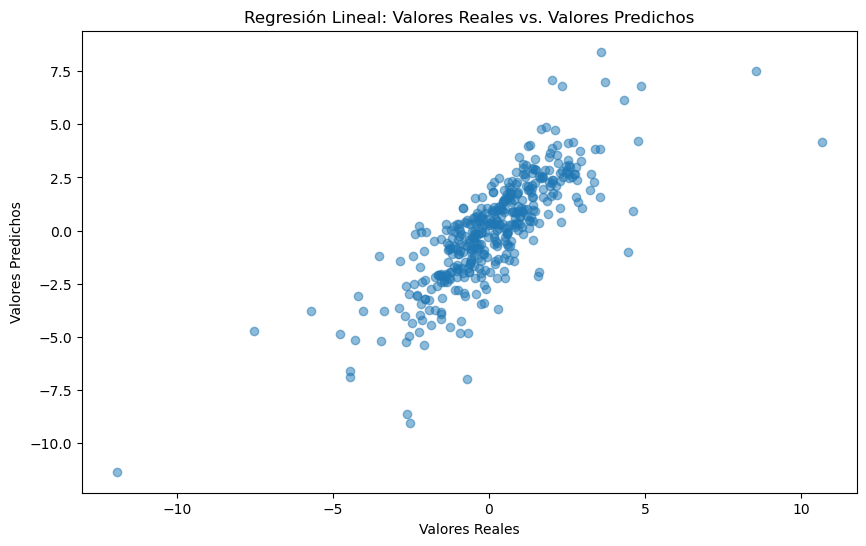

In [147]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Preparar los datos para el entrenamiento
train, valid = train_test_split(train_data, test_size=0.1, random_state=42, shuffle=False)

y_train = train['ChangeRatio']
X_train = train.drop(columns=['ChangeRatio'])

y_valid = valid['ChangeRatio']
X_valid = valid.drop(columns=['ChangeRatio'])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_valid_scaled)

rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
mse = mean_squared_error(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)  

print(f"RMSE: {rmse}")
print(f"MSE: {mse}")
print(f"R2: {r2}")

print(f"Predicciones positivas reales: {np.sum(y_valid > 0)}")
print(f"Predicciones positivas predichas: {np.sum(y_pred > 0)}")

print(f"Predicciones negativas reales: {np.sum(y_valid < 0)}")
print(f"Predicciones negativas predichas: {np.sum(y_pred < 0)}")

accuracy = np.sum((y_valid> 0) & (y_pred > 0)) + np.sum((y_valid < 0) & (y_pred < 0))
accuracy = accuracy / len(y_valid)
print(f"Accuracy: {accuracy}")

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_valid, y_pred, alpha=0.5)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Regresión Lineal: Valores Reales vs. Valores Predichos')
plt.show()

RMSE: 2.3154854499640067
MSE: 5.361472868995019
R2: 0.14464474891019086
Predicciones positivas reales: 8
Predicciones positivas predichas: 9
Predicciones negativas reales: 13
Predicciones negativas predichas: 12
Accuracy: 0.7619047619047619


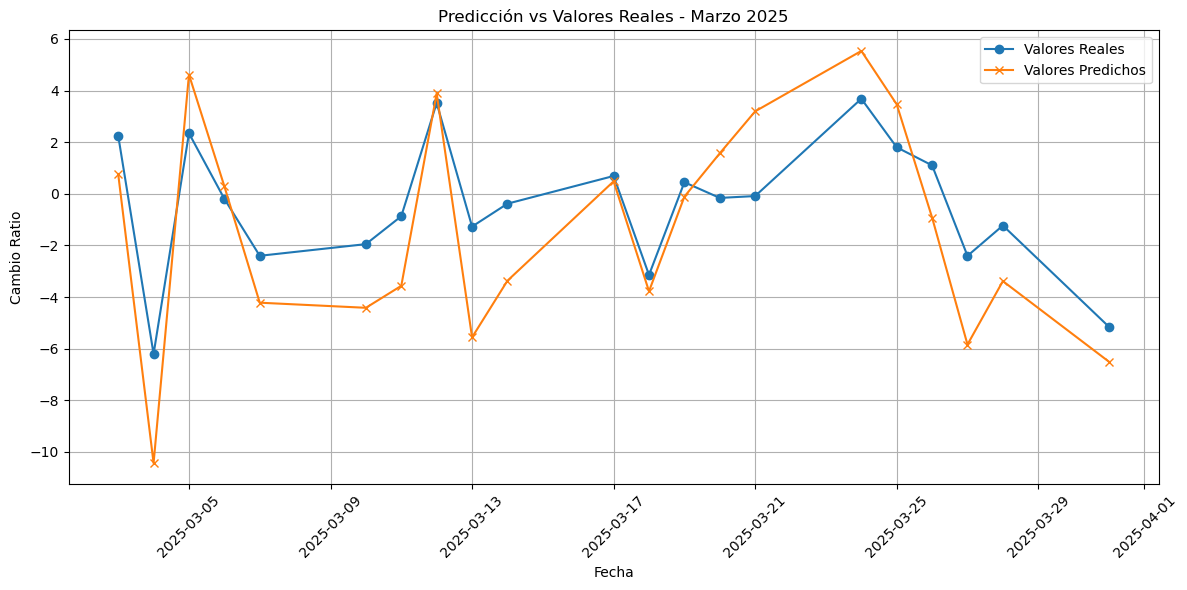

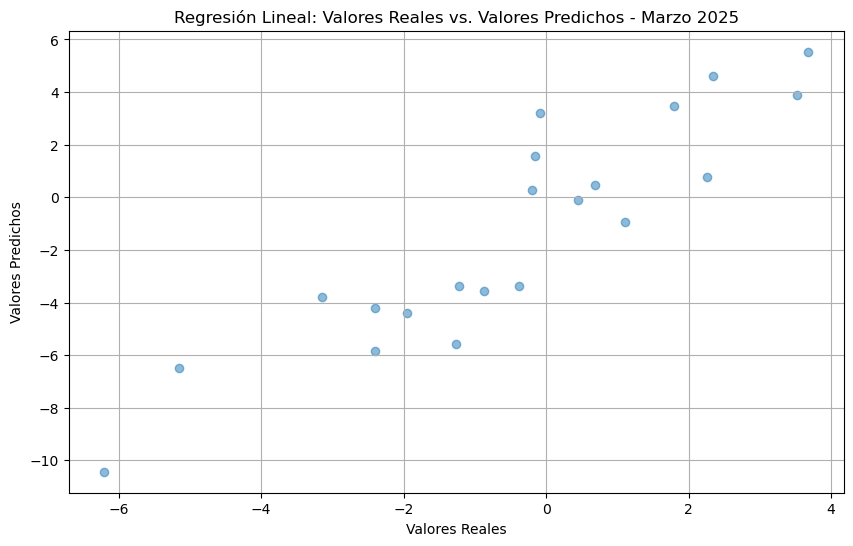

In [148]:
# Cargar los datos de prueba (marzo 2025)
test_data = pd.read_csv('../data/processed/AMZN_test.csv')

# Asegurarse de que tenemos la columna de fecha
amazon_data_test_with_date = pd.read_csv('../data/raw/AMZN_with_SP500.csv')
amazon_data_test_with_date = amazon_data_test_with_date[amazon_data_test_with_date['Date'] >= '2025-03-01']
amazon_data_test_with_date = amazon_data_test_with_date[amazon_data_test_with_date['Date'] <= '2025-03-31']

# Preparar datos para predicción
X_test = test_data.drop(columns=['ChangeRatio'])
y_test = test_data['ChangeRatio']
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

# Métricas de evaluación
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)  

print(f"RMSE: {rmse}")
print(f"MSE: {mse}")
print(f"R2: {r2}")

print(f"Predicciones positivas reales: {np.sum(y_test > 0)}")
print(f"Predicciones positivas predichas: {np.sum(y_pred > 0)}")

print(f"Predicciones negativas reales: {np.sum(y_test < 0)}")
print(f"Predicciones negativas predichas: {np.sum(y_pred < 0)}")

accuracy = np.sum((y_test > 0) & (y_pred > 0)) + np.sum((y_test < 0) & (y_pred < 0))
accuracy = accuracy / len(y_test)
print(f"Accuracy: {accuracy}")

# Crear un DataFrame con fechas y valores reales y predichos
result_df = pd.DataFrame({
    'Date': amazon_data_test_with_date['Date'].values[:len(y_test)],
    'Real': y_test.values,
    'Predicción': y_pred
})

# Convertir la columna de fecha a datetime
result_df['Date'] = pd.to_datetime(result_df['Date'])

# Graficar los valores reales y predichos a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(result_df['Date'], result_df['Real'], label='Valores Reales', marker='o')
plt.plot(result_df['Date'], result_df['Predicción'], label='Valores Predichos', marker='x')
plt.xlabel('Fecha')
plt.ylabel('Cambio Ratio')
plt.title('Predicción vs Valores Reales - Marzo 2025')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Regresión Lineal: Valores Reales vs. Valores Predichos - Marzo 2025')
plt.grid(True)
plt.show()

In [149]:
def dia_accion(acciones, precio, cambio, cartera, retirar, umbral=0.4):
    """
    Simula un día de trading sobre una única acción.
    
    Parámetros:
    - acciones: float, número de acciones que tienes al inicio del día.
    - precio:   float, precio unitario de la acción al inicio del día.
    - cambio:   float, predicción de variación porcentual (e.g. +0.03 para +3%).
    - cartera:  float, efectivo disponible al inicio del día.
    - retirar:  bool, flag que indica si ayer marcaste esta acción para retiro masivo.
    - umbral:   float, umbral de “movimiento fuerte” (por defecto 0.4 = 40%).
    
    Devuelve:
    - cartera:  float, efectivo disponible al final del día.
    - precio:   float, nuevo precio de la acción tras aplicar el cambio.
    - acciones: float, número de acciones que tienes al final del día.
    - retirar:  bool, flag para usar mañana si marcaste inversión agresiva.
    """

    # Sólo intentamos vender si tenemos acciones
    if acciones > 0:
        # 1) Retiro masivo (60%) si estaba marcada y hoy no hay un subidón fuerte
        if retirar and cambio <= umbral:
            venta = acciones * 0.6
            cartera += action_to_money(venta, precio)
            acciones -= venta
            retirar = False

        # 2) Retiro moderado (20%) si sigue marcada pero hoy sube > umbral
        if retirar and cambio > umbral:
            venta = acciones * 0.2
            cartera += action_to_money(venta, precio)
            acciones -= venta

        # 3) Retiro por caída: vendemos hasta min(90%, 1.5×|cambio|)
        if cambio < 0:
            porcentaje = min(0.9, 1.5 * abs(cambio))
            venta = acciones * porcentaje
            cartera += action_to_money(venta, precio)
            acciones -= venta

    
    # 4) Si sube más que el umbral, inversión agresiva
    if cambio > umbral:
        # calculamos cuánto invertir: cambio×cartera o 2×cambio×cartera
        factor = 2 if not retirar else 1
        monto = min(abs(cambio) * cartera * factor, cartera * 0.2)
        compras = money_to_action(monto, precio)
        acciones += compras
        cartera -= monto
        retirar = True  # marcamos para posible retiro masivo mañana
    
    # 5) Si sube pero ≤ umbral, inversión moderada
    elif 0 < cambio <= umbral:
        factor = 2 if acciones == 0 else 1
        monto = min(abs(cambio) * cartera * factor, cartera * 0.2)
        compras = money_to_action(monto, precio)
        acciones += compras
        cartera -= monto
    
    # 6) Si no cambia el precio, inversión fija
    elif cambio == 0:
        pct = 0.05 if acciones == 0 else 0.03
        monto = cartera * pct
        compras = money_to_action(monto, precio)
        acciones += compras
        cartera -= monto
    
    # 7) Si cae pero no tenías acciones, pequeña apuesta contraria
    if cambio < 0 and acciones == 0:
        monto = cartera * (0.1 * abs(cambio))
        compras = money_to_action(monto, precio)
        acciones += compras
        cartera -= monto
    
    return cartera, acciones, retirar

In [150]:
raw_data = pd.read_csv('../data/raw/AMZN_with_SP500.csv')
raw_data['Date'] = pd.to_datetime(raw_data['Date'])
last_price = raw_data[raw_data['Date'] == '2025-02-28']['Close'].values[0]
last_price

208.6499938964844

In [190]:
cartera_mensual=200
acciones=0
cartera=cartera_mensual
retirar=False
umbral=0.4
for index, day_data in X_test.iterrows():
    precio = day_data['Close_lag_1']
    # Convertir Series a DataFrame para evitar el error de dimensionalidad
    day_data_df = pd.DataFrame(day_data).transpose()
    day_scaled = scaler.transform(day_data_df)
    cambio_predicho = model.predict(day_scaled)[0]
    cartera, acciones, retirar = dia_accion(acciones, precio, cambio_predicho, cartera, retirar, umbral)

    # Buscar la fecha correspondiente al precio, con manejo de error si no se encuentra
    fecha_match = raw_data[raw_data['Close'] == precio]
    if len(fecha_match) > 0:
        fecha_row_index = fecha_match.index[0] + 1
        if fecha_row_index < len(raw_data):
            fecha_row = raw_data.iloc[fecha_row_index]
            fecha = fecha_row['Date']
            close = fecha_row['Close']
        else:
            fecha = "Fecha no disponible (índice fuera de rango)"
    else:
        fecha = "Fecha no disponible (precio no encontrado)"
    
    cambio_real = ((close - precio) / precio)*100
    print(f"Día {fecha}:")
    print(f"Close día anterior: {precio}")
    print(f"Close día actual: {close}")
    print(f"Cambio predicho: {cambio_predicho}")
    print(f"Cambio real: {cambio_real}")
    print(f"Acciones: {acciones}")
    print(f"Valor acciones en dolares: {action_to_money(acciones, precio)}")
    print(f"Efectivo disponible: {cartera}")
    print(f"Total capital: {cartera + action_to_money(acciones, precio)}")
    print(f"Retirar: {retirar}")
    print("\n")

Día 2025-03-03 00:00:00:
Close día anterior: 208.6499938964844
Close día actual: 213.3500061035156
Cambio predicho: 0.7653768363022089
Cambio real: 2.25258200072748
Acciones: 0.1917
Valor acciones en dolares: 40.0
Efectivo disponible: 160.0
Total capital: 200.0
Retirar: True


Día 2025-03-04 00:00:00:
Close día anterior: 213.3500061035156
Close día actual: 200.1100006103516
Cambio predicho: -10.431864141659986
Cambio real: -6.205767571780648
Acciones: 0.007667999999999994
Valor acciones en dolares: 1.64
Efectivo disponible: 199.26
Total capital: 200.89999999999998
Retirar: False


Día 2025-03-05 00:00:00:
Close día anterior: 200.1100006103516
Close día actual: 204.8000030517578
Cambio predicho: 4.6150541966109975
Cambio real: 2.3437121718561476
Acciones: 0.206868
Valor acciones en dolares: 41.4
Efectivo disponible: 159.408
Total capital: 200.808
Retirar: True


Día 2025-03-06 00:00:00:
Close día anterior: 204.8000030517578
Close día actual: 204.3999938964844
Cambio predicho: 0.28979984

In [ ]:
day_data_index = X_test[X_test['Close_lag_1'] == last_price].index[0]
y_test[day_data_index]

2.25258200072748

In [124]:
day_data = X_test[X_test['Close_lag_1'] == last_price]
day_scaled = scaler.transform(day_data)
day_scaled

array([[ 2.75108806,  3.30258906,  2.81562847,  3.16419618,  3.18119916,
        -1.85088292, -2.44042392, -4.35755099, -1.14629   ,  3.1216707 ,
         3.16419618,  3.19366066,  0.02298395, -1.82272509,  2.95035052,
        -1.82272509,  0.        ,  2.67354186, -4.72331166, -1.82272509,
        -0.03532761, -0.19988898, -0.20700047,  1.71450855,  1.71450855,
         1.69821607, -0.58720968, -0.56995594, -1.46041619, -1.01717401,
         1.76658431, -1.42608591,  2.99271869,  2.93177953,  2.87256557,
         2.97931148,  3.0863763 ,  3.11469207,  3.12896965,  3.19002835,
         3.19795289,  3.1924646 ,  3.22278365,  3.25028287,  3.22644617,
         3.26296661,  3.37577466,  3.32786269,  3.31195148,  2.07615063,
        -0.59183026,  2.84205856,  2.83584763]])

In [ ]:
prediccion = model.predict(day_scaled)[0]
prediccion

0.7653768363022089

Conclusiones 

Las relaciones generadas a través del Feature Engineering fueron bastante útiles para mejorar el rendimiento del modelo. Se logró obtener un RMSE de 0.45, un R² de 0.61 y un MAE de 0.34, lo que indica una capacidad razonable del modelo para predecir los precios de AirBnB.

En cuanto al MSE, se observa una variación de 0.45 con respecto al precio base. Es importante recordar que la métrica inicial era un Log_price, lo que implica que la diferencia en escala logarítmica equivale aproximadamente a 2.81 unidades monetarias en base 10. Esta diferencia no es demasiado alta y sugiere que el modelo ofrece una buena aproximación para la predicción de precios.

Respecto al MAE, el valor de 0.34 indica que, en promedio, el error absoluto en la predicción del log-price es relativamente bajo, lo que refuerza la estabilidad del modelo. Aunque siempre hay margen de mejora, los resultados obtenidos reflejan que el enfoque aplicado fue efectivo y puede ser optimizado aún más con técnicas adicionales de selección de características y ajuste de hiperparámetros.

Aplicaciones y Mejoras Futuras

Las predicciones del modelo pueden utilizarse para ayudar a los anfitriones de AirBnB a fijar precios competitivos basados en características relevantes, como la ubicación, los servicios ofrecidos y la temporada. Además, se pueden integrar en herramientas de análisis de mercado que permitan evaluar tendencias de precios y maximizar ingresos, así como funcionalidades para sugerir precios en base a los datos que incluyan los anfitriones o recomendar tipos de viviendas para los clientes según un precio estimado o presupuesto.

Para mejorar la precisión del modelo, se podrían incorporar datos adicionales, como:

Tendencias temporales: Precios históricos en diferentes épocas del año para capturar estacionalidad. Eventos según la temporada en diferentes ubicaciones (carnaval de Brasil).
Reseñas y calificaciones: Factores cualitativos como la reputación del anfitrión y la satisfacción de los huéspedes. Se podría obtener analizando palabras claves de las reseñas.
Competencia en la zona: Número de alojamientos similares disponibles en un radio determinado.
Eventos locales: La demanda de hospedaje puede variar por conciertos, conferencias u otras actividades. Se podría obtener esta data haciendo web scrapping de una fecha especcífica de búsqueda de alojamiento